In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense


Epoch 1/10


d:\SEM_2_SETU\ml\ML_Algorithms_shon\.venv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 38s 37ms/step - accuracy: 0.2571 - loss: 2.1315 - val_accuracy: 0.3461 - val_loss: 1.9167
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 36s 36ms/step - accuracy: 0.3840 - loss: 1.8253 - val_accuracy: 0.3557 - val_loss: 1.9032
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 36s 36ms/step - accuracy: 0.4310 - loss: 1.7138 - val_accuracy: 0.3511 - val_loss: 1.9163
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 36s 36ms/step - accuracy: 0.4738 - loss: 1.5885 - val_accuracy: 0.3399 - val_loss: 1.9525
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 36s 36ms/step - accuracy: 0.5055 - loss: 1.4809 - val_accuracy: 0.3244 - val_loss: 2.0293
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 36s 36ms/step - accuracy: 0.5401 - loss: 1.3766 - val_accuracy: 0.3196 - val_loss: 2.1273
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 36s 36ms/step - accuracy: 0.5784 - loss: 1.2757 - val_accuracy: 0.3077 - val_loss: 2.2393
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 36s 36ms/step - accuracy: 0.6080 - loss: 1.18

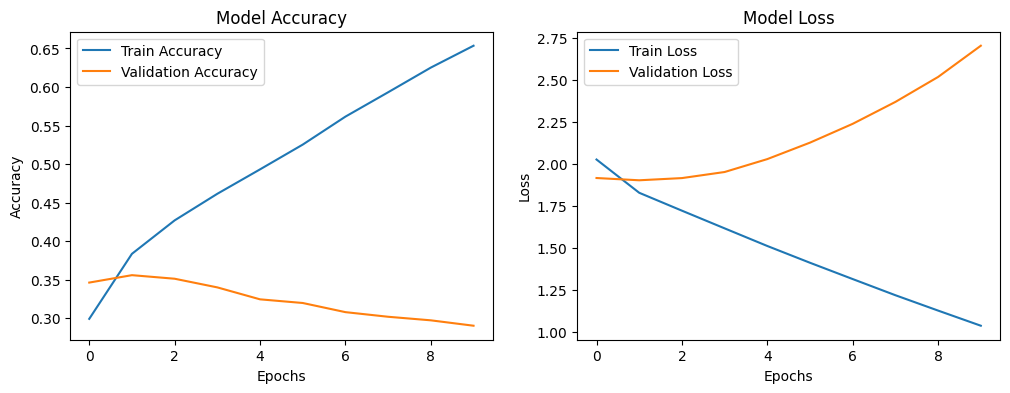

In [3]:

# Load dataset
df = pd.read_csv('tweet_emotions.csv')  # Ensure the dataset file is available

# Preprocessing
texts = df['content'].values  # Text column contains input text
labels = df['sentiment'].values  # Emotion column contains labels

# Encode labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)  # Convert labels to numerical format

# Tokenization
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index

# Padding
max_length = 100  # Adjust as necessary
X = pad_sequences(sequences, maxlen=max_length)

# Splitting dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building LSTM model
model = Sequential([
    Embedding(input_dim=len(word_index) + 1, output_dim=64, input_length=max_length),
    LSTM(64, return_sequences=False),
    Dense(len(label_encoder.classes_), activation='softmax')  # Multi-class classification
])

# Compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()
